Accuracy: 1.0


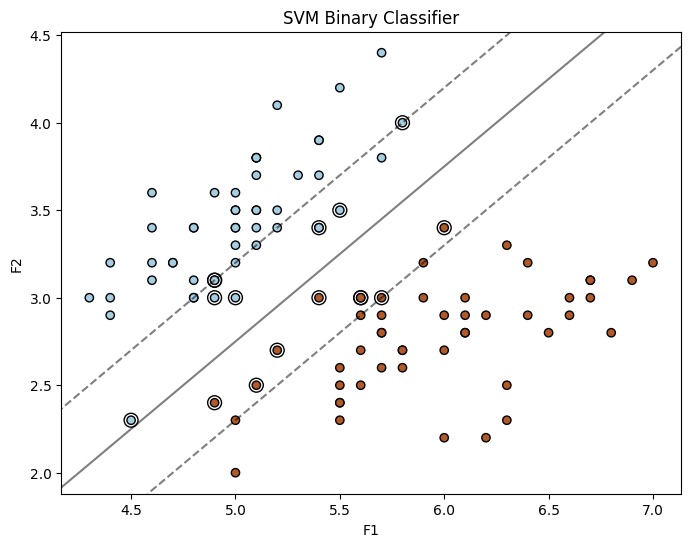

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics, model_selection

X, y = datasets.load_iris(return_X_y=True)
X, y = X[y != 2, :2], y[y != 2]

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

clf = svm.SVC(kernel='linear').fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
plt.xlabel('F1')
plt.ylabel('F2')
plt.title('SVM Binary Classifier')
ax = plt.gca()
xx, yy = np.meshgrid(np.linspace(*ax.get_xlim(), 30)np.linspace(*ax.get_ylim(), 30))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')
plt.show()
